# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

Assignment 1
Sara Gamal
43-2141


In [4]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial import distance


> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [7]:
Data_points= np.array([[2,2],[3,4],[5,6],[7,8],[2,4]])
Cluster_centro = np.random.rand(2,2)

def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    
    Cluster_Distance=np.zeros((len(Data_points),len(Cluster_Centroids)))
    if (Distance_Type =='euclidean'):

        Cluster_Distance=distance.cdist(Data_points,Cluster_Centroids,'euclidean')
    else:
        for i in range(len(Cluster_Centroids)):

            for j in range(len(Data_points)):

                Cluster_Distance[j][i]=1 - ((np.sum((Cluster_Centroids[i]- np.mean(Cluster_Centroids))*(Data_points[j]- np.mean(Data_points))))/((np.sqrt(np.sum(np.square(Cluster_Centroids[i]- np.mean(Cluster_Centroids)))*(np.sum(np.square(Data_points[j]- np.mean(Data_points))))))))
              # Cluster_Distance=distance.cdist(Data_points,Cluster_Centroids,'correlation')
    return Cluster_Distance 


In [8]:
d=GUC_Distance(Cluster_centro,Data_points,'r')
d

array([[1.25544792, 0.19763143],
       [1.72903447, 0.63591147],
       [1.13605685, 1.97019747],
       [0.89686947, 1.88488638],
       [1.79195643, 0.7279164 ]])

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [9]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type):
     
      min_distance=1000000000000000
      
      for i in range(100):



        Cluster_centroids = Data_points[np.random.choice(len(Data_points),Number_of_Clusters,replace=False)]
        intialCen=Cluster_centroids.copy()
        while(True):


          centroidsold = Cluster_centroids.copy()
 
          Cluster_Distance = GUC_Distance(Cluster_centroids,Data_points,Distance_Type)
         
          
          classes = np.argmin(Cluster_Distance,axis=1)
          c=np.amin(Cluster_Distance,axis=1)
          # print(c)
          # print(classes)
            # update position
          for j in range(Number_of_Clusters):

            Cluster_centroids[j,:] = Data_points[classes == j].mean(axis=0)
          # print('center')
          # print(Cluster_centroids)
          if (Cluster_centroids == centroidsold).all():

          #  print('Centroid converged')
           break
        df=pd.DataFrame(Data_points)
        df['cluster']=classes
        distor=sum(np.square(c))/len(Data_points)
        # print(distor)
        if(distor<min_distance):
          min_distance=distor
          minclusCen=Cluster_centroids
          finalclasses=classes
          df_final=df
       
     

          
    
      return [ finalclasses,minclusCen,Number_of_Clusters,min_distance,df_final ]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [10]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [12]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,c=[],centers=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[c==i,0],X[c==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(centers[i][0],centers[i][1],c = color[i], marker = 'x', s = 100)

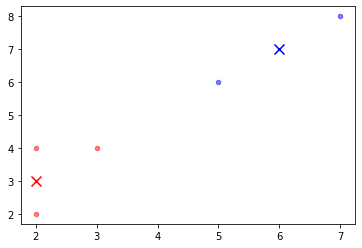

In [13]:
c,center,n,mindist,df=GUC_Kmean(Data_points,2,'euclidean')

display_cluster(Data_points,c,center,2)

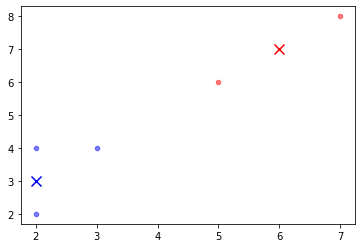

In [14]:
c,center,n,mindist,df=GUC_Kmean(Data_points,2,'r')

display_cluster(Data_points,c,center,2)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

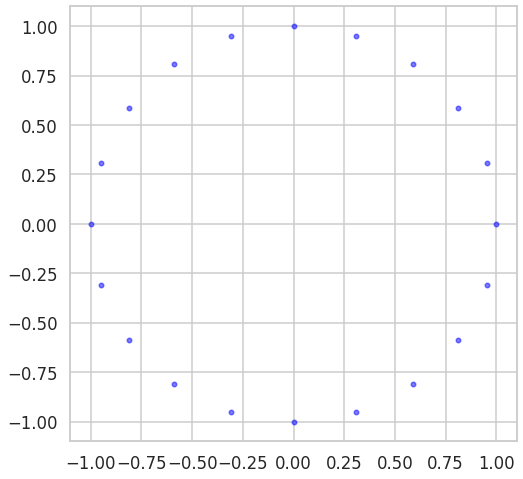

In [15]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()

# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

#### 2.3. Example 3 : moons Data Gen and display 

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

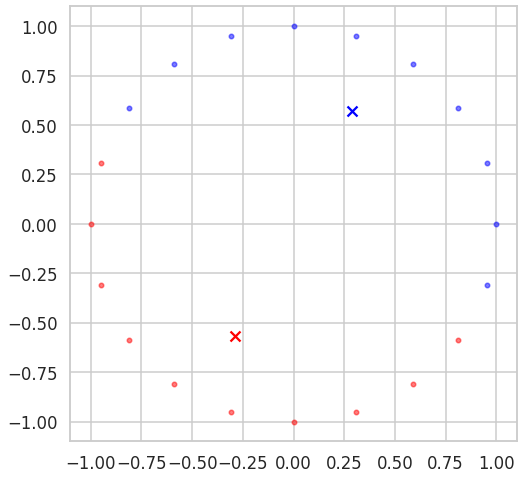

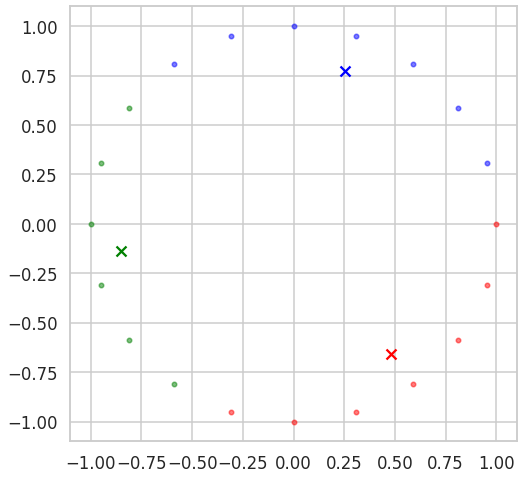

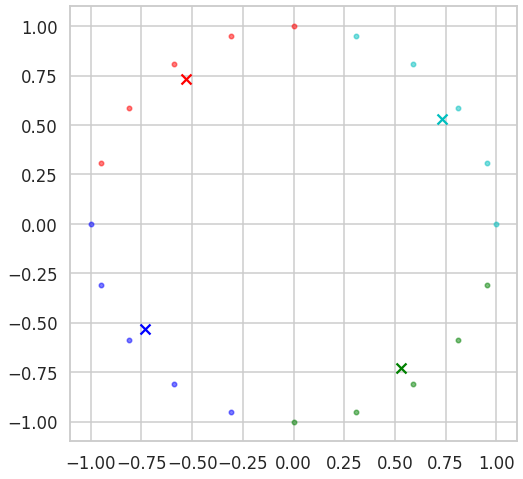

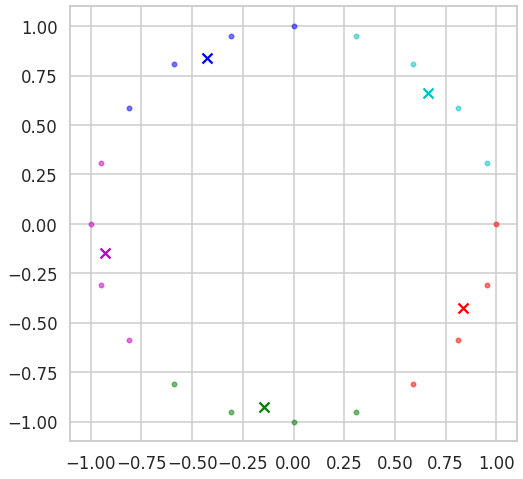

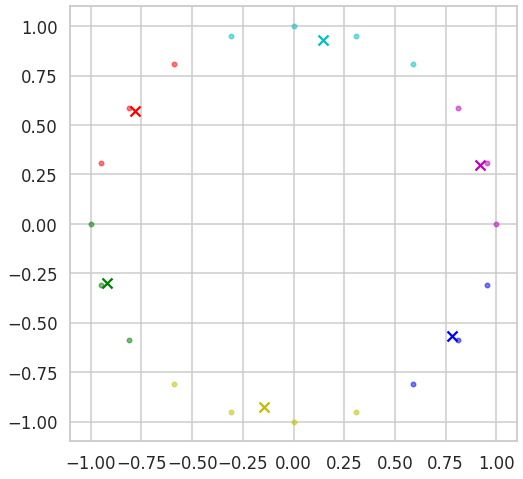

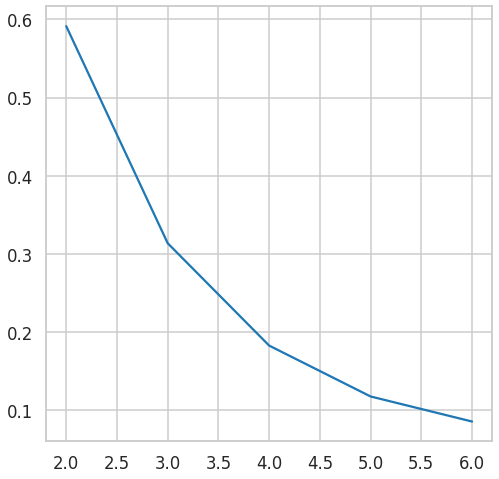

In [ ]:
# Example 1
distances=[]
k=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for j in range(2,7):
  c,center,n,mindist,df=GUC_Kmean(X,j,'euclidean')
  plt.figure() 
  display_cluster(X,c,center,j)
  distances.append(mindist)
  k.append(j)




plt.figure()
plt.plot(k,distances)

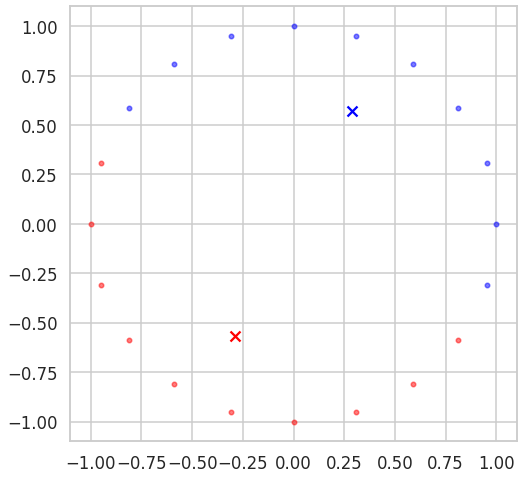

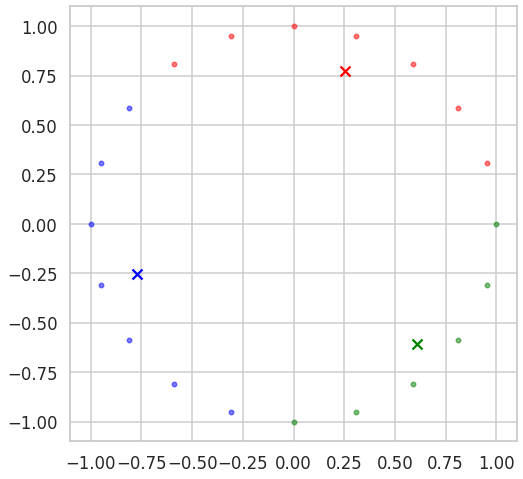

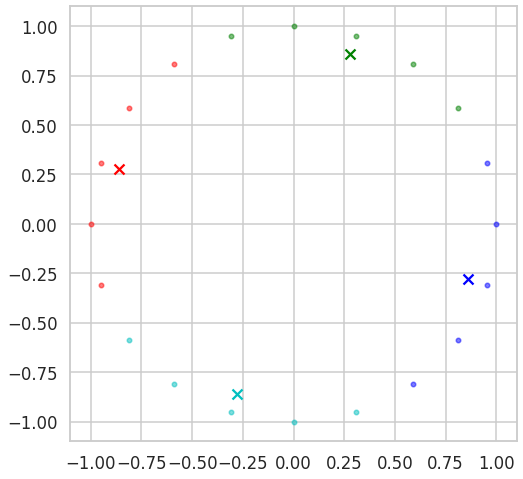

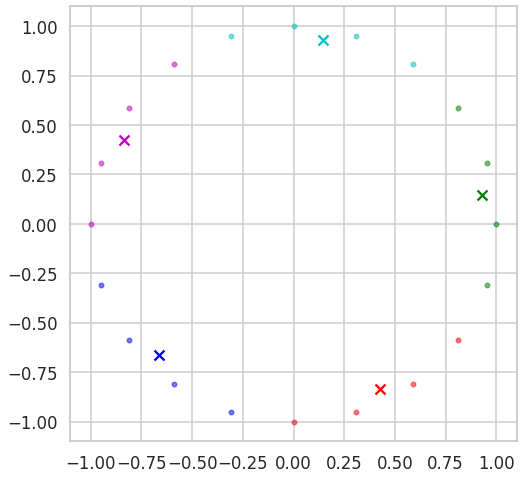

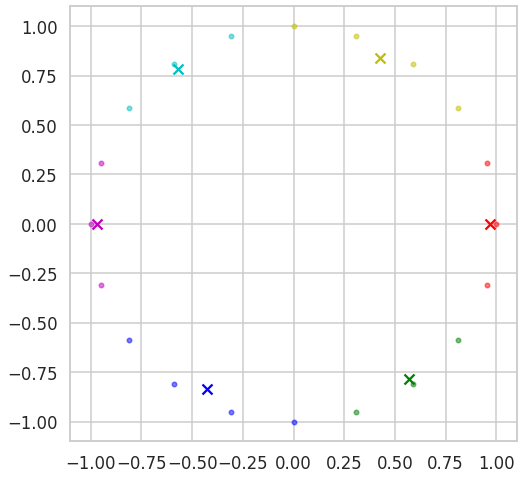

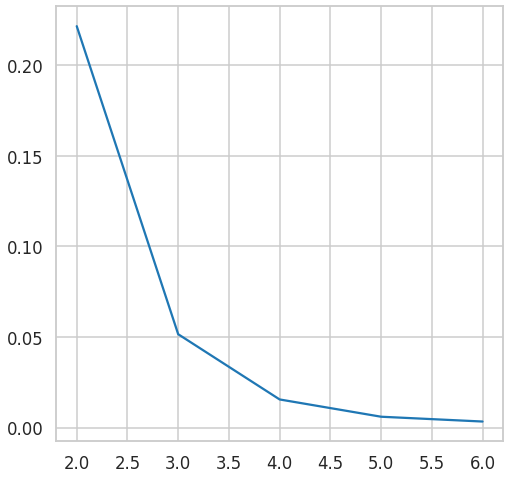

In [ ]:
# Example 1
distances=[]
k=[]
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
for j in range(2,7):
  c,center,n,mindist,df=GUC_Kmean(X,j,'r')
  plt.figure() 
  display_cluster(X,c,center,j)
  distances.append(mindist)
  k.append(j)




plt.figure()
plt.plot(k,distances)

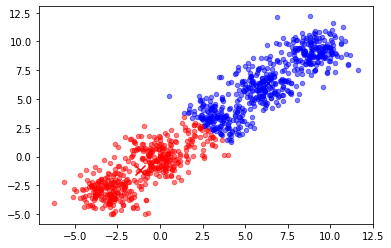

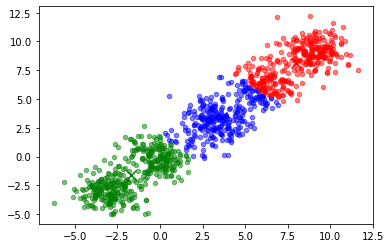

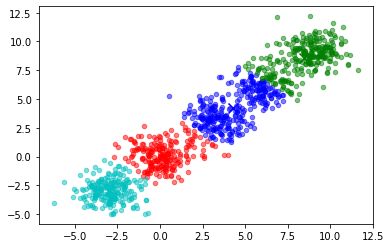

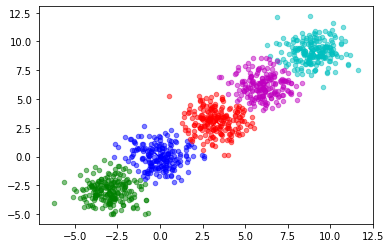

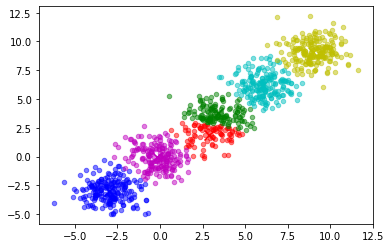

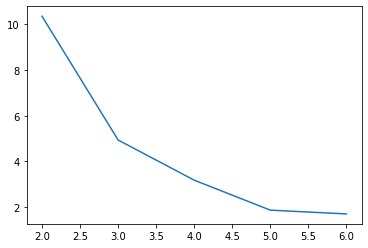

In [ ]:
# Example 2
distances=[]
k=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
for j in range(2,7):
  c,center,n,mindist,df=GUC_Kmean(X,j,'euclidean')
  plt.figure() 
  display_cluster(X,c,center,j)
  distances.append(mindist)
  k.append(j)




plt.figure()
plt.plot(k,distances)

In [ ]:
# Example 2
distances=[]
k=[]
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
for j in range(2,7):
  c,center,n,mindist,df=GUC_Kmean(X,j,'r')
  plt.figure() 
  display_cluster(X,c,center,j)
  distances.append(mindist)
  k.append(j)




plt.figure()
plt.plot(k,distances)

In [ ]:
# Example 3
distances=[]
k=[]
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)

for j in range(2,7):
  c,center,n,mindist,df=GUC_Kmean(X,j,'euclidean')
  plt.figure() 
  display_cluster(X,c,center,j)
  distances.append(mindist)
  k.append(j)




plt.figure()
plt.plot(k,distances)

In [ ]:
# Example 3
distances=[]
k=[]
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)

for j in range(2,7):
  c,center,n,mindist,df=GUC_Kmean(X,j,'r')
  plt.figure() 
  display_cluster(X,c,center,j)
  distances.append(mindist)
  k.append(j)




plt.figure()
plt.plot(k,distances)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [2]:
data = pd.read_csv('/content/Customer data.csv')
data.drop('ID',axis=1,inplace=True)
data.head()


NameError: ignored

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2=data[['Income','Age']]
x=scaler.fit(df2)
data[['Income','Age']] = scaler.transform(df2)
data.head()
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=df2.columns)
# X_train_scaled

NameError: ignored

In [ ]:
# from itertools import combinations
# com=list(combinations(data,2))

# for i in range(len(com)):

#   d=data[list(com[i])].values
distances=[]
k=[]
for m in range(2,7):

  c,center,n,mindist,df=GUC_Kmean(data.values,m,'euclidean')
  plt.figure() 
  display_cluster(data.values,c,center,m)
  distances.append(mindist)
  k.append(m)
plt.figure()
plt.plot(k,distances)

